In [1]:
# @hidden_cell
# The project token is an authorization token that is used to access project resources like data sources, connections, and used by platform APIs.
#from project_lib import Project
#project = Project(project_id='bc8b4556-cb0e-44b8-985d-822613ddd8ad', project_access_token='p-72a63f6925c3ff86fb9091dd1b286a4c547be2ae')
#pc = project.project_context


# Fallstudie Smart Banking 
vorlegt von Thi Yen Vy Huynh
Matrikelnummer: 800584

Für diese Fallstudie wird der [Customer Churn Datensatz](https://www.kaggle.com/mathchi/churn-for-bank-customers) verwendet.
Es wird mithilfe des Algorithmus versucht eine Klassifizierung vorherzusagen, ob ein Kunde abwandern 
wird oder nicht. Darüberhinaus soll herausgefunden werden, welche Variablen die Kundenabwanderung beeinflussen.

Der Datensatz beinhaltet folgende Eigenschaften:
* **RowNumber**: Entspricht der Datensatzzeilennummer und hat keinen Einfluss auf die Ausgabe.
* **CustomerId:** Enthält zufällige Werte und hat keinen Einfluss auf den Austritt des Kunden aus der Bank.
* **Surname:** Der Nachname eines Kunden hat keine Auswirkungen auf dessen Entscheidung, die Bank zu verlassen.
* **CreditScore:** Kann eine Auswirkung auf die Kundenabwanderung haben, da ein Kunde mit einem höheren Kreditscore die Bank weniger wahrscheinlich verlässt.
* **Geography:** Land (Germany/France/Spain). Der Standort eines Kunden kann seine Entscheidung, die Bank zu verlassen, beeinflussen.
* **Gender:** Geschlecht (W/M). Es ist interessant zu untersuchen, ob das Geschlecht eine Rolle dabei spielt, dass ein Kunde die Bank verlässt.
* **Age:** Dies ist sicherlich relevant, da ältere Kunden ihre Bank seltener verlassen als jüngere.
* **Tenure:** Bezieht sich auf die Anzahl der Jahre, die der Kunde bereits Kunde der Bank ist. Normalerweise sind ältere Kunden loyaler und verlassen eine Bank seltener.
* **Balance:** Ist ebenfalls ein sehr guter Indikator für die Kundenabwanderung, da Kunden mit einem höheren Guthaben auf ihren Konten die Bank seltener verlassen als Kunden mit einem niedrigeren Guthaben.
* **NumOfProducts:** Bezieht sich auf die Anzahl der Produkte, die ein Kunde über die Bank gekauft hat.
* **HasCrCard:** Gibt an, ob ein Kunde eine Kreditkarte besitzt oder nicht (0 = Nein, 1 = Ja). Diese Spalte ist ebenfalls relevant, da Personen mit einer Kreditkarte die Bank seltener verlassen.
* **IsActiveMember:** Mitgliedsstatus (0 = Nein, 1 = Ja). Aktive Kunden verlassen die Bank mit geringerer Wahrscheinlichkeit.
* **EstimatedSalary:** Wie beim Saldo ist es wahrscheinlicher, dass Personen mit niedrigeren Gehältern die Bank verlassen, als solche mit höheren Gehältern.
* **Exited:** Ob der Kunde die Bank verlassen hat oder nicht (0 = Nein, 1 = Ja).

## Libraries importieren

In [2]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## Die Daten

In [3]:
#my_file = project.get_file("churn.csv")

# Read the CSV data file from the object storage into a pandas DataFrame
#my_file.seek(0)
#data = pd.read_csv(my_file)
#data.head()

data=pd.read_csv("churn.csv")
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
data.shape

(10000, 14)

In [6]:
data["Exited"].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [8]:
data.describe(include='all')

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
unique,NaN,NaN,2932,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Smith,NaN,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,32,NaN,5014,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5000.50000,1.569094e+07,NaN,650.528800,NaN,NaN,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,NaN,96.653299,NaN,NaN,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,NaN,350.000000,NaN,NaN,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,NaN,584.000000,NaN,NaN,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,NaN,652.000000,NaN,NaN,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,NaN,718.000000,NaN,NaN,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000


### Duplikate prüfen

In [9]:
data[data.duplicated(keep=False)]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


In [10]:
data['CustomerId'][data['CustomerId'].duplicated(keep=False)]

Series([], Name: CustomerId, dtype: int64)

### Null-Werte prüfen

In [11]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

**Nicht relevante Spalten löschen**

In [12]:
data1= data.drop(["RowNumber","CustomerId","Surname"],axis=1)

- RowNumber entspricht dem Zeilenindex
- CustomerId und Surname sind nicht relevant für die weitere Analyse

**Neuer Datensatz**

In [13]:
data1.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [14]:
data1.shape

(10000, 11)

- 10000 Zeilen und 11 Spalten

## 3.2 Data Understanding 
Der Datensatz beinhaltet keine Duplikate und keine Null-Werte und besteht wie zu Beginn aus 10000 Zeilen und nach Entfernung der ersten Spalte namens "Zeilennummer" aus 13 Spalten.

### Explorative Datenanalyse
Begonnen wird mit den numerischen Attributen. Zunächst werden die Verteilungen der numerischen Attribute einzeln untersucht und in einem zweiten Schritt werden die kategorischen Attribute in Zusammenhang mit der Zielvariable gesetzt.

In [15]:
sns.set_style(style="whitegrid")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000230FBA82370>,
      dtype=object)

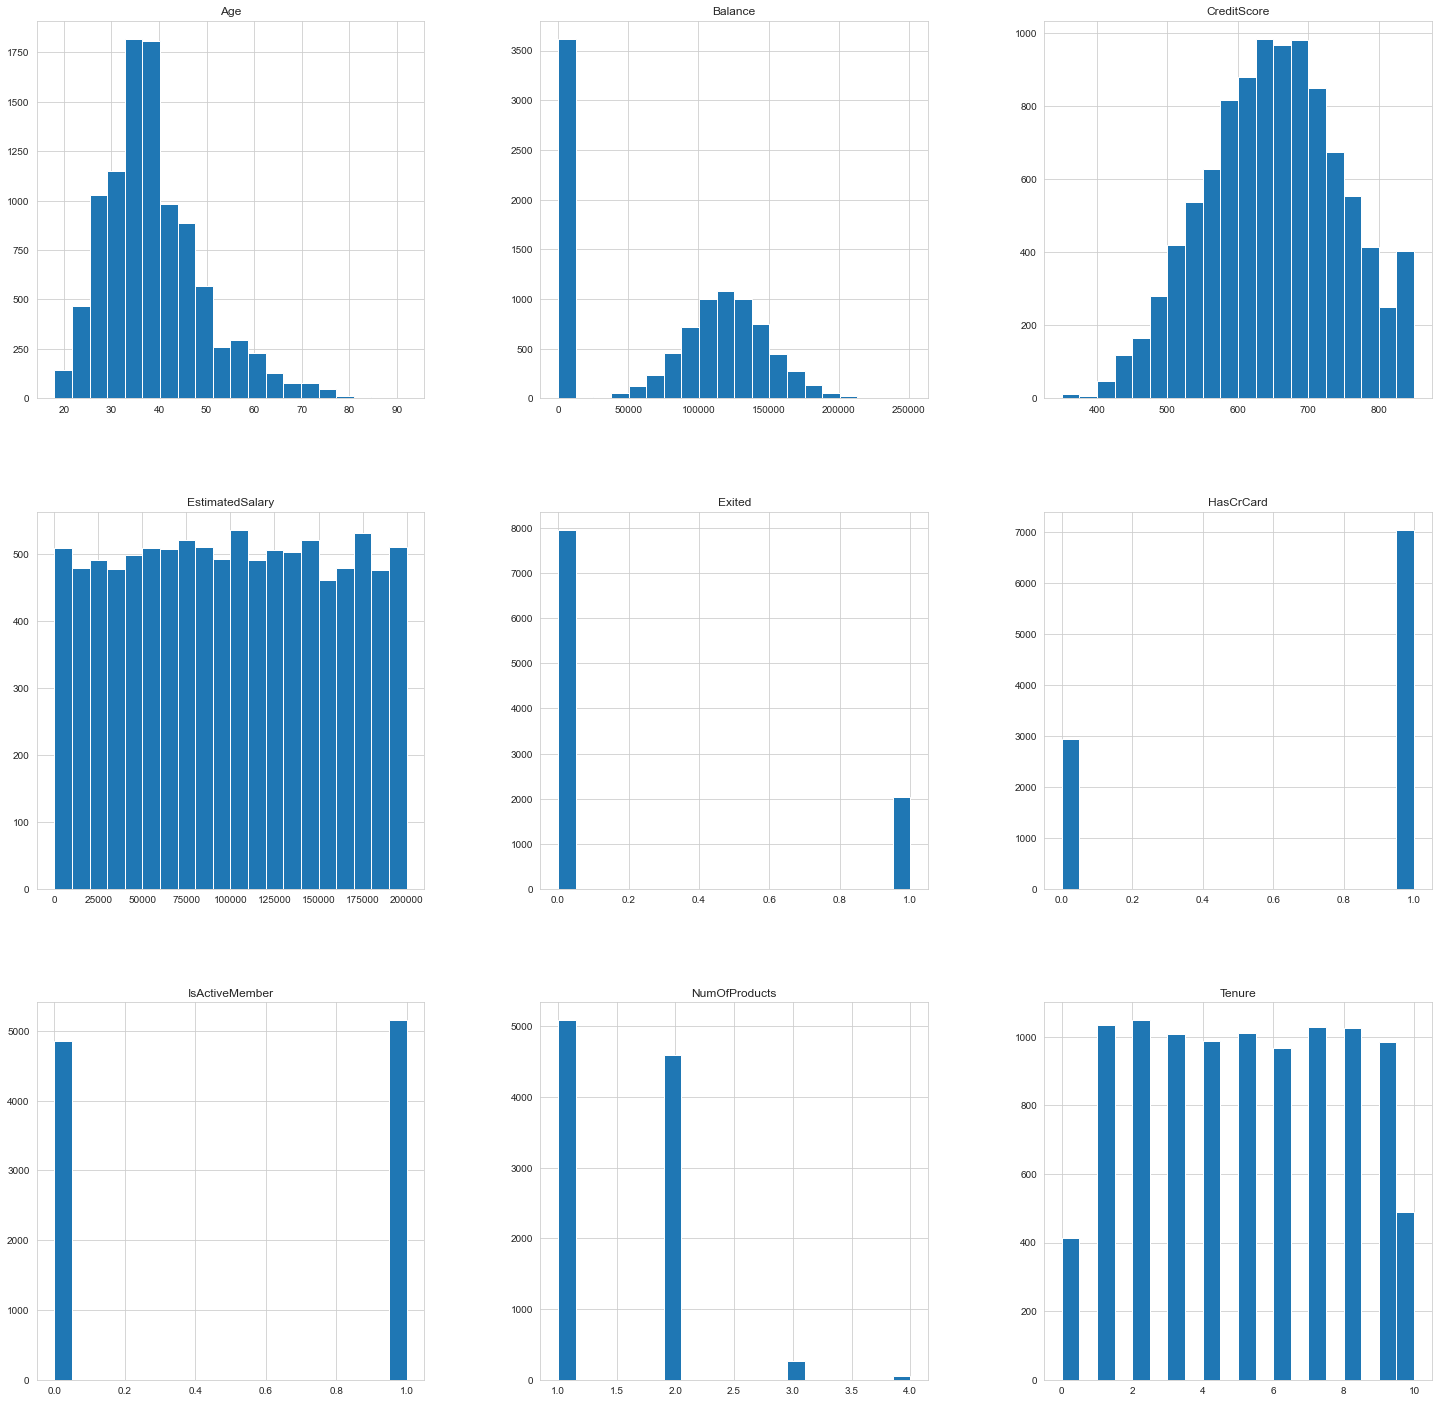

In [16]:
data1.hist(figsize=(25,25), bins=20)

In [17]:
#sns.pairplot(data, hue="Exited", palette="rainbow")

**3.2.1 Credit Score, Age, Tenure, Balance, EstimatedSalary**

**Credit Score**

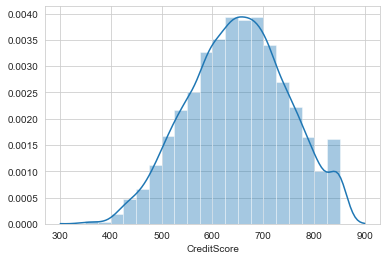

In [18]:
sns.distplot(data1["CreditScore"],kde=True, bins=20)

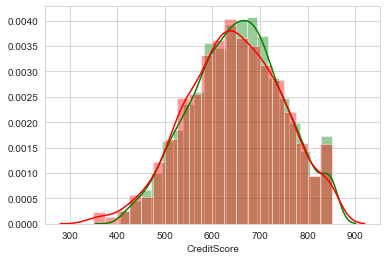

In [19]:
sns.distplot(data1[data1.Exited == 0]["CreditScore"],
             bins=20,
             color='green',
             label='Non-Exited',
             kde=True)
sns.distplot(data1[data1.Exited == 1]["CreditScore"],
             bins=20,
             color='red',
             label='Exited',
             kde=True)

- Normalverteilung erkennbar 
- Ausreißer an Anfang?
- Ein Großteil der Kunden befindet sich im mittleren bis höheren Bereich der Credit Scores
- Kein Zusammenhang/Einfluss des Credit Scores auf die Kundenabwanderung zu erkennen

**Age**

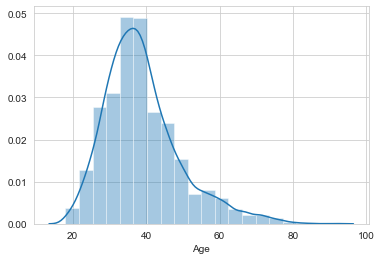

In [20]:
sns.distplot(data1["Age"],kde=True, bins=20)

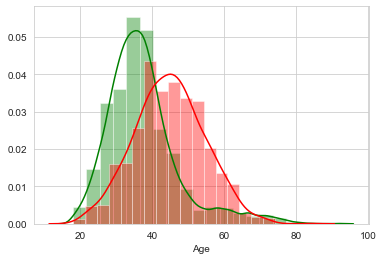

In [21]:
sns.distplot(data1[data1.Exited == 0]["Age"],
             bins=20,
             color='green',
             label='Non-Exited',
             kde=True)
sns.distplot(data1[data1.Exited == 1]["Age"],
             bins=20,
             color='red',
             label='Exited',
             kde=True)

- Normalverteilung erkennbar
- mögliche Ausreißer am Ende?

**Tenure**

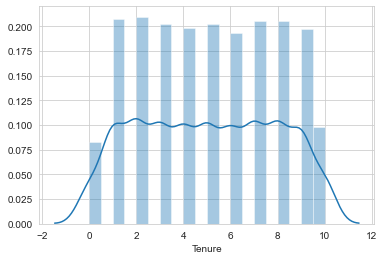

In [22]:
sns.distplot(data1["Tenure"],kde=True, bins=20)

- Variable Tenure könnte eher als kategorische Variable zwischen 0 und 10 angesehen werden

**Balance**

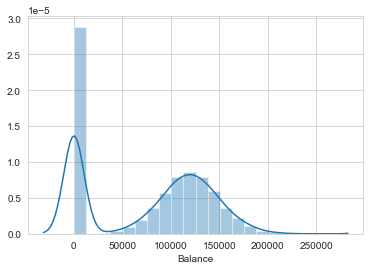

In [23]:
sns.distplot(data1["Balance"],kde=True, bins=20)

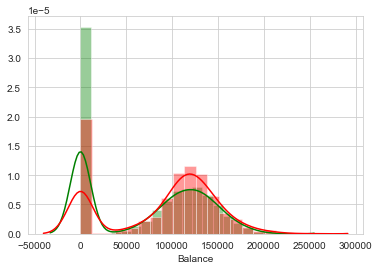

In [24]:
sns.distplot(data1[data1.Exited == 0]["Balance"],
             bins=20,
             color='green',
             label='Non-Exited',
             kde=True)
sns.distplot(data1[data1.Exited == 1]["Balance"],
             bins=20,
             color='red',
             label='Exited',
             kde=True)

- Ausreißer am Ende?
- Die meisten Kunden haben einen Bankguthaben von 0, welches das Feature Balance unbalanciert macht

**Estimated Salary**

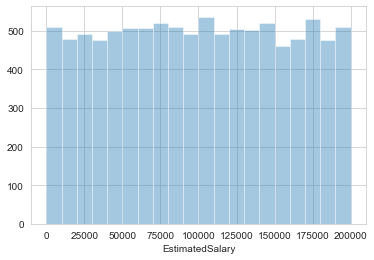

In [25]:
sns.distplot(data1["EstimatedSalary"],kde=False, bins=20)

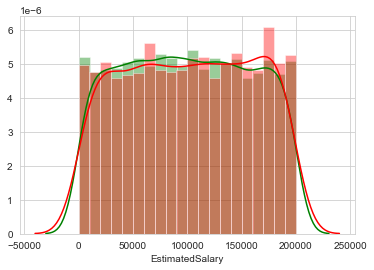

In [26]:
sns.distplot(data1[data1.Exited == 0]["EstimatedSalary"],
             bins=20,
             color='green',
             label='Non-Exited',
             kde=True)
sns.distplot(data1[data1.Exited == 1]["EstimatedSalary"],
             bins=20,
             color='red',
             label='Exited',
             kde=True)

**Korrelationsmatrix der numerischen Variablen**

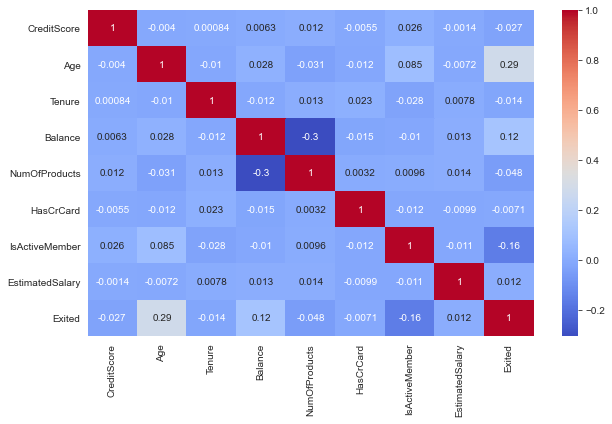

In [27]:
plt.figure(figsize=(10,6))
feature_corr = data1.corr()
sns.heatmap(feature_corr, annot=True, cmap='coolwarm')

**Interpretation**

- Das Feature Age hat die stärkste positive Korrelation mit dem Feature Exited (0.29). Das bedeutet, dass mit zunehmenden Alter, die Kundenabwanderung ebenfalls zunimmt
- Zwischen Balance und Exited ist im Verleich zu den anderen Features eine hohe Korrelation zusehen (0.12).

**3.2.2 Exited, Geography, Gender, Num of Products, Has Credid Card, Is Active Member**

**Exited = Zielvariable**

Text(0.5, 1.0, 'Kundenabwanderung im Vergleich zur Nicht-Abwanderung')

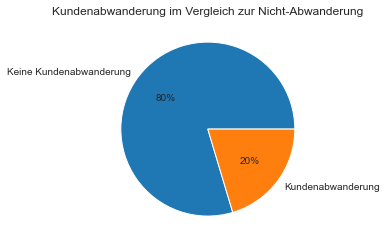

In [28]:
churn_rate = data1.Exited.value_counts() / len(data1.Exited)
labels = 'Keine Kundenabwanderung', 'Kundenabwanderung'
fig, ax = plt.subplots()
ax.pie(churn_rate, labels=labels, autopct='%.f%%')  
ax.set_title('Kundenabwanderung im Vergleich zur Nicht-Abwanderung')

- Die Kundenabwanderungen entspricht rund 20% des Gesamtdatensatzes, während die Kunden-nicht-Abwanderungen rund 80% entsprechen.
- Damit handelt es sich um einen unbalancierten Datensatz

**Geography**

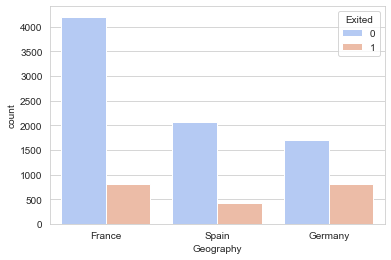

In [29]:
sns.countplot(x="Geography",data=data1,hue="Exited",palette="coolwarm")

In [30]:
print(data1["Geography"].value_counts())

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64


In [31]:
data1.groupby("Geography").sum()["Exited"]

Geography
France     810
Germany    814
Spain      413
Name: Exited, dtype: int64

- Kundenabwanderung in Frankreich und Deutschland gleich groß, obwohl in Frankreich insgesamt mehr Kunden vorhanden sind 
- durchschnittliche Kundenabwanderung in Deutschland im Vergleich zu den anderen beiden Ländern am größten
- unbalancierte Variable

**Gender**

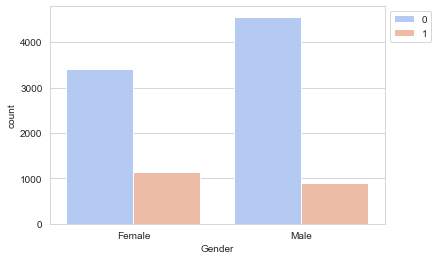

In [32]:
plt.figure()
sns.countplot(x="Gender",data=data1,hue="Exited",palette="coolwarm")
plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))
plt.show()

In [33]:
print(data1["Gender"].value_counts())

Male      5457
Female    4543
Name: Gender, dtype: int64


In [34]:
data1.groupby("Gender").sum()["Exited"]

Gender
Female    1139
Male       898
Name: Exited, dtype: int64

- Die Anzahl an männlichen und weiblichen Kunden unterscheidet sich lediglich im 900 - balancierte Variable
- Weibliche Kunden wandern eher ab als die männlichen Kunden

**Num of Products**

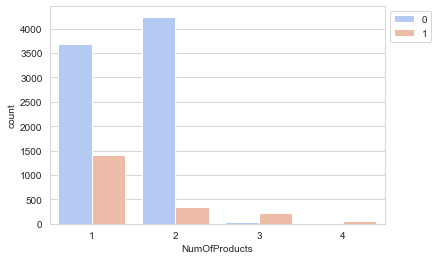

In [35]:
sns.countplot(x="NumOfProducts",data=data1,hue="Exited",palette="coolwarm")
plt.legend(loc="upper left",bbox_to_anchor=(1.0,1.0))

In [36]:
print(data1["NumOfProducts"].value_counts())
data1.groupby("NumOfProducts").sum()["Exited"]

1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64


NumOfProducts
1    1409
2     348
3     220
4      60
Name: Exited, dtype: int64

- Es fällt auf, dass von den gesamten Kunden 60 dabei sind, die 4 Produkte besitzen & auch alle abgewandert sind.
- Kunden die 1 oder 2 Produkte besitzen, wandern eher nicht ab
- unbalancierte Variable - Ausreißer bei Produkt 4?

**Has Credit Card**

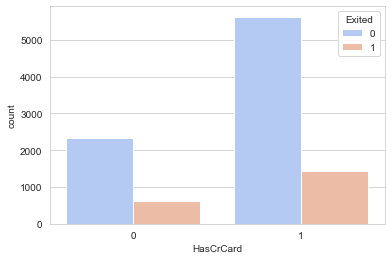

In [37]:
sns.countplot(x="HasCrCard",data=data1,hue="Exited",palette="coolwarm")

In [38]:
print(data1["HasCrCard"].value_counts())
data1.groupby("HasCrCard").sum()["Exited"]

1    7055
0    2945
Name: HasCrCard, dtype: int64


HasCrCard
0     613
1    1424
Name: Exited, dtype: int64

- Die meisten Kunden besitzen eine Kreditkarte und wandern eher nicht ab
- Ca. die Hälfte der Kunden die keine Kreditkarte besitzen, wandern ab
- unbalancierte Variable

**Is Active Member**

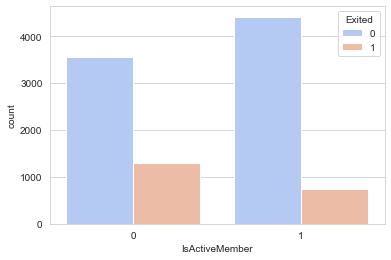

In [39]:
sns.countplot(x="IsActiveMember",data=data1,hue="Exited",palette="coolwarm")

In [40]:
print(data1["IsActiveMember"].value_counts())
data1.groupby("IsActiveMember").sum()["Exited"]

1    5151
0    4849
Name: IsActiveMember, dtype: int64


IsActiveMember
0    1302
1     735
Name: Exited, dtype: int64

- Aktivität und Inaktivität ist fast gleich hoch - balancierte Variable 

**Tenure**

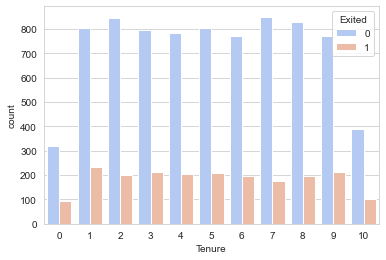

In [41]:
sns.countplot(x="Tenure",data=data1,hue="Exited",palette="coolwarm")

In [42]:
print(data1["Tenure"].value_counts())
data1.groupby("Tenure").sum()["Exited"]

2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: Tenure, dtype: int64


Tenure
0      95
1     232
2     201
3     213
4     203
5     209
6     196
7     177
8     197
9     213
10    101
Name: Exited, dtype: int64

- Die meisten Kunden sind zwischen 1 und 9 Jahren in der Bank
- Kein Zusammenhang zwischen Kundenlänge und Abwanderung
- Tenure kann entfernt werden

**Entfernung Tenure**

In [43]:
data1_1=data1.drop("Tenure",axis=1)

## 3.3 Data Preparation

**3.3.1 Ausreißer, die in der EDA erwähnt wurden überprüfen**

**Credit Score**

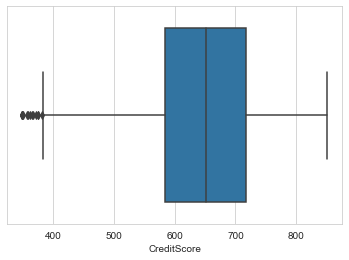

In [44]:
sns.boxplot(data1_1["CreditScore"])

- Ausreißer im vorderen Bereich erkennbar

In [45]:
q=data1_1["CreditScore"].quantile(0.01) #Da Ausreißer im vorderen Bereich
data2 = data1_1[data1["CreditScore"]>q]

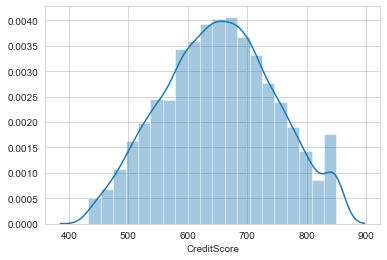

In [46]:
sns.distplot(data2["CreditScore"],kde=True, bins=20)

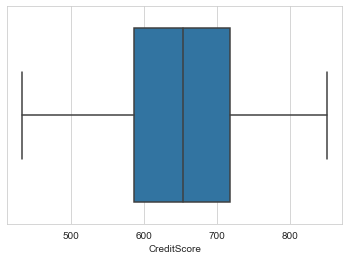

In [47]:
sns.boxplot(data2["CreditScore"])

**Age** 

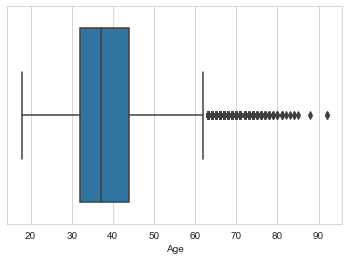

In [48]:
sns.boxplot(data1["Age"])

- Ausreißer im hinteren Bereich erkennbar

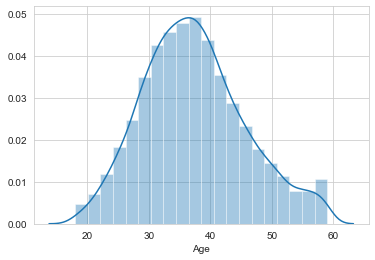

In [49]:
q=data2["Age"].quantile(0.95)
data3 = data2[data2["Age"]<q]
sns.distplot(data3["Age"],kde=True, bins=20)

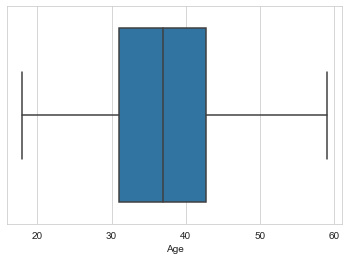

In [50]:
sns.boxplot(data3["Age"])

**Balance** 

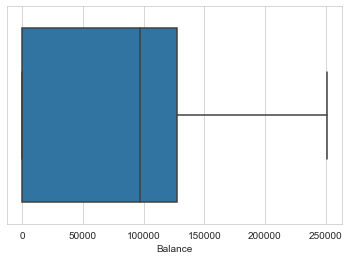

In [51]:
sns.boxplot(data1["Balance"])

- Keine Ausreißer erkennbar

**NumOfProducts**

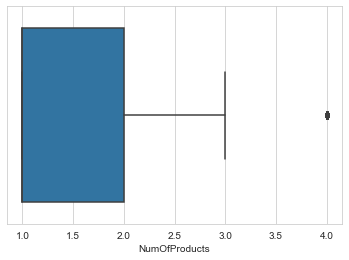

In [52]:
sns.boxplot(data1["NumOfProducts"])

- Produkt 4 ist ein Ausreißer

In [53]:
q=data3["NumOfProducts"].quantile(0.999)
data4= data3[data3["NumOfProducts"]<q]


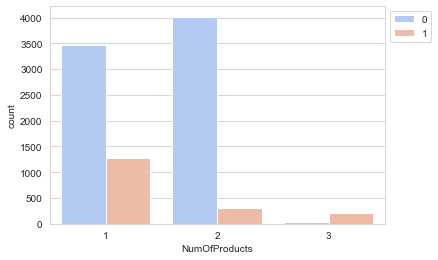

In [54]:
sns.countplot(x="NumOfProducts",data=data4,hue="Exited",palette="coolwarm")
plt.legend(loc="upper left",bbox_to_anchor=(1.0,1.0))

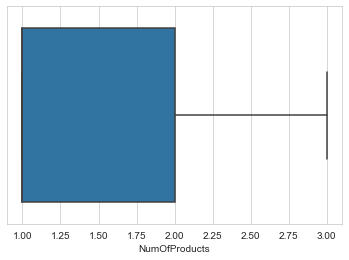

In [55]:
sns.boxplot(data4["NumOfProducts"])

**Neuer Datensatz**

In [56]:
data4.head()

,CreditScore,Geography,Gender,Age,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,125510.82,1,1,1,79084.10,0


In [57]:
data4.shape

(9323, 10)

- Neuer Datensatz nach Entfernung der Outliers besteht aus 10 Spalten und 9323 Zeilen

**Neue Korrelationsmatrix**

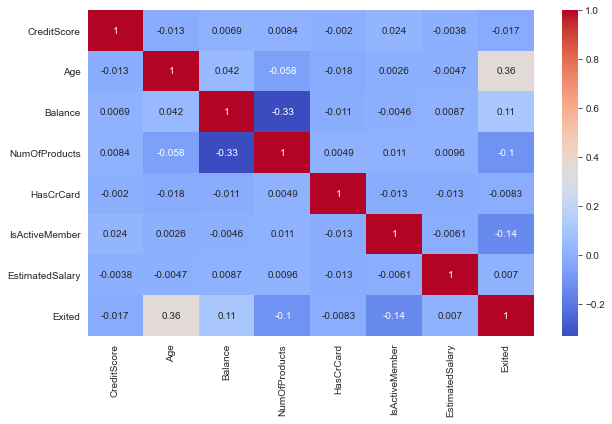

In [58]:
plt.figure(figsize=(10,6))
feature_corr = data4.corr()
sns.heatmap(feature_corr, annot=True, cmap='coolwarm')

- In der neuen Korrelationsmatrix ist wie zu vor zwischen Age und Exited die größte Korrelation mit 0.36
- Zwischen Balance und Exited ist im Verleich zu den anderen Features eine hohe positive Korrelation zusehen (0.11)
- Exited und NumOfProducts weisen eine hohe negative Korrelation mit -0.1

**3.3.2 Feature Engineering**

In [59]:
data4["NumOfProducts"] = data4["NumOfProducts"].astype("category")
data4["HasCrCard"] = data4["HasCrCard"].astype("category")
data4["IsActiveMember"] = data4["IsActiveMember"].astype("category")

In [60]:
data5 = pd.get_dummies(data4,drop_first=True)

In [61]:
data5

,CreditScore,Age,Balance,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male,NumOfProducts_2,NumOfProducts_3,HasCrCard_1,IsActiveMember_1
0,619,42,0.00,101348.88,1,0,0,0,0,0,1,1
1,608,41,83807.86,112542.58,0,0,1,0,0,0,0,1
2,502,42,159660.80,113931.57,1,0,0,0,0,1,1,0
3,699,39,0.00,93826.63,0,0,0,0,1,0,0,0
4,850,43,125510.82,79084.10,0,0,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,0.00,96270.64,0,0,0,1,1,0,1,0
9996,516,35,57369.61,101699.77,0,0,0,1,0,0,1,1
9997,709,36,0.00,42085.58,1,0,0,0,0,0,0,1
9998,772,42,75075.31,92888.52,1,1,0,1,1,0,1,0


**3.3.3 Multikollinearität überprüfen**

In [62]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
  
# unabhängige Variablen
vif_test = data5.drop("Exited", axis=1)
  
# VIF dataframe 
vif_data = pd.DataFrame() 
vif_data["feature"] = vif_test.columns 
  
# VIF für jedes Feature 
vif_data["VIF"] = [variance_inflation_factor(vif_test.values, i) 
                          for i in range(len(vif_test.columns))] 
  
print(vif_data)

              feature        VIF
0         CreditScore  20.710187
1                 Age  15.804177
2             Balance   3.388799
3     EstimatedSalary   3.882472
4   Geography_Germany   1.790507
5     Geography_Spain   1.491191
6         Gender_Male   2.176027
7     NumOfProducts_2   2.179566
8     NumOfProducts_3   1.066362
9         HasCrCard_1   3.275108
10   IsActiveMember_1   1.993649


- CreditScore hat den höchsten VIF Wert und wird entfernt

In [63]:
data5.drop("CreditScore",axis=1,inplace=True)

In [64]:
# the independent variables set 
vif_test = data5.drop("Exited", axis=1)
  
# VIF dataframe 
vif_data = pd.DataFrame() 
vif_data["feature"] = vif_test.columns 
  
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(vif_test.values, i) 
                          for i in range(len(vif_test.columns))] 
  
print(vif_data)

             feature       VIF
0                Age  8.139785
1            Balance  3.220185
2    EstimatedSalary  3.673914
3  Geography_Germany  1.790268
4    Geography_Spain  1.476541
5        Gender_Male  2.125724
6    NumOfProducts_2  2.026351
7    NumOfProducts_3  1.065979
8        HasCrCard_1  3.116127
9   IsActiveMember_1  1.956681


- Keine Variablen vorhanden die einen VIF über 10 haben

In [65]:
data5.head()

,Age,Balance,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male,NumOfProducts_2,NumOfProducts_3,HasCrCard_1,IsActiveMember_1
0,42,0.00,101348.88,1,0,0,0,0,0,1,1
1,41,83807.86,112542.58,0,0,1,0,0,0,0,1
2,42,159660.80,113931.57,1,0,0,0,0,1,1,0
3,39,0.00,93826.63,0,0,0,0,1,0,0,0
4,43,125510.82,79084.10,0,0,1,0,0,0,1,1


In [66]:
data5.shape

(9323, 11)

- Nach Kodierung der kategorischen Werte sind noch 11 Spalten und 9323 Zeilen vorhanden

**3.3.4 Standardisierung der numerischen Variablen**

In [67]:
y= data5["Exited"]
X= data5.drop("Exited", axis=1)

In [68]:
from sklearn.preprocessing import StandardScaler
num_features = ["Age","Balance","EstimatedSalary"]

scaler = StandardScaler()

X[num_features] = scaler.fit_transform(X[num_features])
X.head()

,Age,Balance,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male,NumOfProducts_2,NumOfProducts_3,HasCrCard_1,IsActiveMember_1
0,0.562012,-1.224498,0.018450,0,0,0,0,0,1,1
1,0.441674,0.117529,0.213004,0,1,0,0,0,0,1
2,0.562012,1.332173,0.237146,0,0,0,0,1,1,0
3,0.200998,-1.224498,-0.112292,0,0,0,1,0,0,0
4,0.682350,0.785325,-0.368527,0,1,0,0,0,1,1


**3.3.5 Test- und Trainingsdatensatz erstellen**

In [69]:
from sklearn.model_selection import train_test_split

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=365)

## 3.4 Modellbildung und Evaluation

### Logistische Regression

### 3.4.1 Statsmodels

**Training und Vorhersage**

In [71]:
# Konstante hinzufügen
#X_const = sm.add_constant(X_train)
# Modell erstellen
#log_reg = sm.Logit(y_train, X_const).fit() 
#print(log_reg.summary())

Das trainierte Modell weist statistisch nicht signifikante Variablen aus. Dies ist gegeben wenn der Wert P>|z| größer als 0,05 ist und es sich nicht um die Konstante handelt. 

- Entfernung der nicht signifikanten Variablen

In [72]:
#insignificant_features = ["EstimatedSalary", "Geography_Spain", "HasCrCard_1"]
#X_train.drop(insignificant_features, axis=1, inplace=True)
#X_test.drop(insignificant_features, axis=1, inplace=True)

Ertellung eines zweiten Modells

In [73]:
#X_const = sm.add_constant(X_train)
#log_reg2 = sm.Logit(y_train, X_const).fit() 
#print(log_reg2.summary())

**Modellierung Modell**

In [74]:
# Finales Modell
#X_const = sm.add_constant(X_train)
#log_reg_final = sm.Logit(y_train, X_const).fit() 
#print(log_reg_final.summary())
# Neues Modell
#X_const = sm.add_constant(X_train)
#log_reg2 = sm.Logit(y_train, X_const).fit() 
#print(log_reg2.summary())

**Vorhersage**

In [75]:
# Vorhersage
#y_hat = log_reg_final.predict(sm.add_constant(X_test)) 
# Statsmodel gibt nur die Wahrscheinlichkeiten an, deshalb muss gerundet werden.  
#prediction = list(map(round, y_hat))

### 3.4.2 Scikit-Learn

3.4.1.1 Desicion Tree Classifier

In [86]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics

In [93]:
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
print('Trainigsdaten: ')
print(classification_report(y_train, tree.predict(X_train))) 
print('Testdaten: ')
print(classification_report(y_test, tree.predict(X_test)))

Trainigsdaten: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6022
           1       1.00      1.00      1.00      1436

    accuracy                           1.00      7458
   macro avg       1.00      1.00      1.00      7458
weighted avg       1.00      1.00      1.00      7458

Testdaten: 
              precision    recall  f1-score   support

           0       0.87      0.88      0.87      1502
           1       0.48      0.47      0.47       363

    accuracy                           0.80      1865
   macro avg       0.68      0.67      0.67      1865
weighted avg       0.80      0.80      0.80      1865



- In der Training Performance ist ein 100%-iges overfitting vorhanden

In [97]:
# Accuracy Score für Testdatensatz ermitteln
acc_1 = metrics.accuracy_score(y_test, tree.predict(X_test))
print('Accuracy auf dem Testdatensatz: {}'.format(acc_1))

Accuracy auf dem Testdatensatz: 0.7978552278820376


Da es sich um einen unbalancierten Datensatz handelt, müssen weitere Metriken analysiert werden

Text(0.5, 43.0, 'Predicted label')

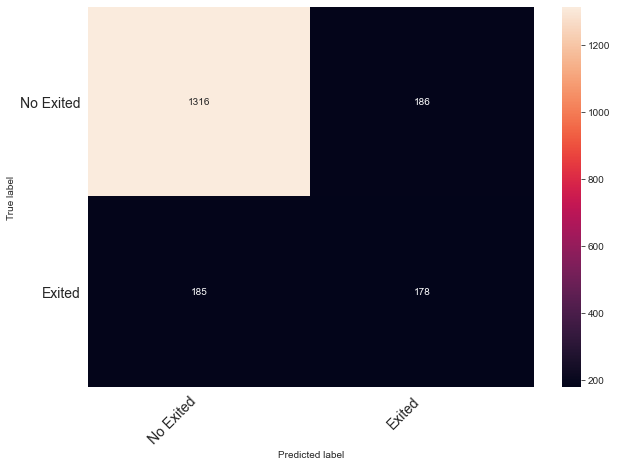

In [83]:
conf_mat = confusion_matrix(y_test, tree.predict(X_test))
df_cm = pd.DataFrame(conf_mat, index=['No Exited','Exited'], columns=['No Exited', 'Exited'],)
fig = plt.figure(figsize=[10,7])
heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=14)
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [99]:
# Metriken aus Konfusionsmatrix auslesen 
tn, fp, fn, tp = conf_mat.ravel()
recall = tp/(fn+tp)
precision = tp/(tp+fp)
print("True Negatives: " + str(tn))
print("False Positives: " + str(fp))
print("False Negatives: " + str(fn))
print("True Positives: " + str(tp))
print("Recall: " + str(recall))
print("Precision: " + str(precision))

True Negatives: 1316
False Positives: 186
False Negatives: 185
True Positives: 178
Recall: 0.4903581267217631
Precision: 0.489010989010989


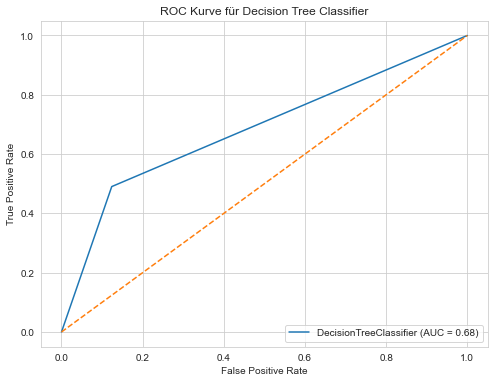

In [87]:
# ROC-Kurve, AUC für Decision Tree
fig, ax = plt.subplots(figsize=(8,6))
ax.set_title('ROC Kurve für Decision Tree Classifier')
plot = metrics.plot_roc_curve(tree, X_test, y_test, ax=ax);
ax.plot([0,1], [0,1], '--');


Die Area under Curve (AUC) beschreibt die Fläche unter der Kurve. Die ROC-Kurve (Receiver Operating Characteristic) ist eine Beziehung zwischen True Positive Rate und False Positive Rate. Der Decision Tree Classifier hat einen Bereich von 0.68 unter dieser Kurve.

3.4.1.2 Logistic Regression

**Training und Vorhersage**

In [88]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression()

**Vorhersage auf Testdaten**

In [89]:
logistic_model.fit(X_train,y_train)
prediction_test = logistic_model.predict(X_test)
prediction_train = logistic_model.predict(X_train)

**Evaluation**

In [90]:
from sklearn import metrics

# Accuracy Score für Testdatensatz ermitteln
acc = metrics.accuracy_score(y_test, prediction_test)
print('Accuracy auf dem Testdatensatz: {}'.format(acc))

Accuracy auf dem Testdatensatz: 0.8541554959785522


In [91]:
# Accuracy Score für Trainingsdatensatz ermitteln
acc_train = metrics.accuracy_score(y_train, prediction_train)
print('Accuracy auf dem Trainingsdatensatz: {}'.format(acc))

Accuracy auf dem Trainingsdatensatz: 0.8541554959785522


Die Accuracy auf dem Testdatensatz zeigt ein gutes Modell mit 0.85 und schneidet besser ab als der Decision Tree Classifier. Da es sich um einen unbalancierten Datensatz handelt, müssen weitere Metriken analysiert werden

In [92]:
# Klassifikations Report
print("Trainingsdaten:")
print(classification_report(y_train,prediction_train))
print("Testdaten:")
print(classification_report(y_test,prediction_test))

Trainingsdaten:
              precision    recall  f1-score   support

           0       0.87      0.96      0.91      6022
           1       0.71      0.41      0.52      1436

    accuracy                           0.85      7458
   macro avg       0.79      0.69      0.72      7458
weighted avg       0.84      0.85      0.84      7458

Testdaten:
              precision    recall  f1-score   support

           0       0.87      0.96      0.91      1502
           1       0.71      0.42      0.53       363

    accuracy                           0.85      1865
   macro avg       0.79      0.69      0.72      1865
weighted avg       0.84      0.85      0.84      1865



Accuracy als auch die anderen Werte bei Test- und Trainingsdatensatz sind sehr ähnlich. Es wird von keinem Overfitting ausgegangen, da die Accuracy-Werte bei Test und Training gleich groß sind.

Text(0.5, 43.0, 'Predicted label')

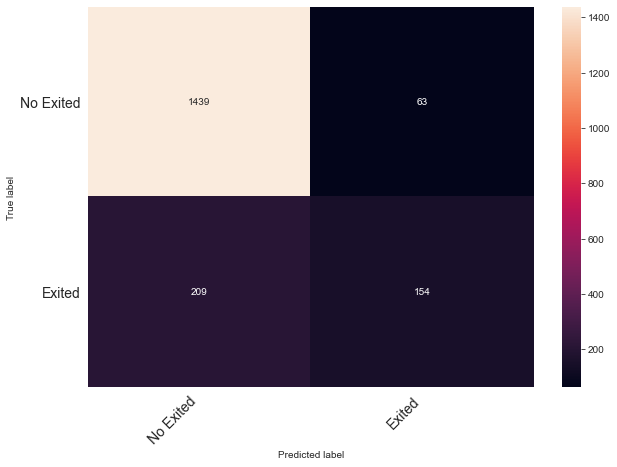

In [94]:
# Confusion-Matrix Testdaten
cm = confusion_matrix(y_test,prediction_test)
df_cm = pd.DataFrame(cm, index=['No Exited','Exited'], columns=['No Exited', 'Exited'],)
fig = plt.figure(figsize=[10,7])
heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=14)
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [95]:
# Metriken aus Konfusionsmatrix auslesen 
tn, fp, fn, tp = cm.ravel()
recall = tp/(fn+tp)
precision = tp/(tp+fp)
print("True Negatives: " + str(tn))
print("False Positives: " + str(fp))
print("False Negatives: " + str(fn))
print("True Positives: " + str(tp))
print("Recall: " + str(recall))
print("Precision: " + str(precision))

True Negatives: 1439
False Positives: 63
False Negatives: 209
True Positives: 154
Recall: 0.42424242424242425
Precision: 0.7096774193548387


Precision und Recall bieten ein deutlich realistischeres Bild des Modells. Es erzielt eine Precision von rund 71% und einen Recall von 42%. Der Recall ist für den Anwendungsfall deutlich wichtiger und muss deshalb auf Kosten der Precision verbessert werden.

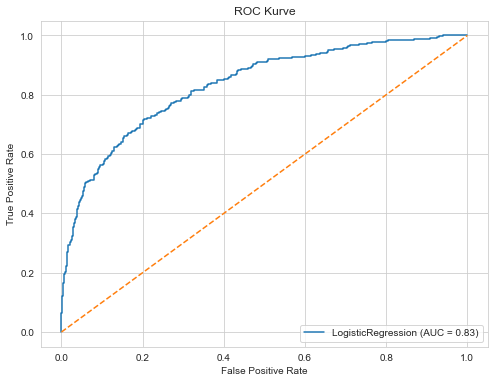

In [96]:
# ROC-Kurve, AUC
fig, ax = plt.subplots(figsize=(8,6))
ax.set_title('ROC Kurve')
plot = metrics.plot_roc_curve(logistic_model, X_test, y_test, ax=ax);
ax.plot([0,1], [0,1], '--');

Die AUC der ROC-Kurve liefert einen guten Wert von 0,83. Daraus lässt sich schließen, dass das Logistische Modell ein besseres AUC Wert liefert als der Decision Tree Classifier.

### Interpretation der Ergebnisse 

In [101]:
# Regressionskoeffizienten auslesen und damit Wichtigkeit der einzelnen Attribute herausfinden
weights = pd.Series(logistic_model.coef_[0],
 index=X_train.columns.values)
weights.sort_values(ascending = False)

NumOfProducts_3      2.557443
Geography_Germany    0.993037
Age                  0.969099
EstimatedSalary      0.016613
Geography_Spain     -0.015997
HasCrCard_1         -0.054154
Balance             -0.088302
Gender_Male         -0.545768
IsActiveMember_1    -0.818667
NumOfProducts_2     -1.581399
dtype: float64

AxesSubplot(0.125,0.125;0.775x0.755)


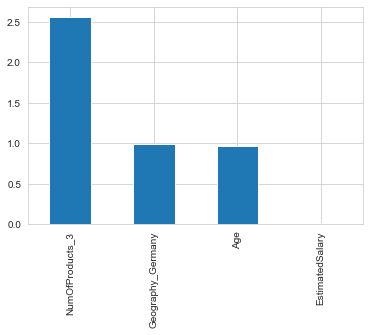

In [102]:
weights = pd.Series(logistic_model.coef_[0],
                 index=X_train.columns.values)
print (weights.sort_values(ascending = False)[:4].plot(kind='bar'))

Die drei wichtigsten Features, die zu einer Abwanderung führen sind:

- Anzahl der Produkte (NumOfProduct_3),
- die Geographie (Geography_Germany) und
- das Kundenalter (Age)

AxesSubplot(0.125,0.125;0.775x0.755)


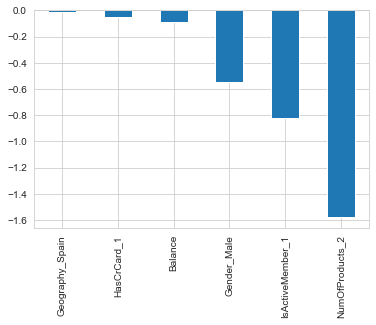

In [103]:
# Wichtigste Features, die Kunden von einer Abwanderung abhalten
print(weights.sort_values(ascending = False)[-6:].plot(kind='bar'))

Die drei wichtigsten Features, die Kunden von einer Abwanderung abhalten sind:
- Die Anzahl der Produkte (NumOfProducts_2),
- die aktive Mitgliedshaft (IsActive Member_1) und                
- das Geschlecht des Kunden (Gender_Male).

## 3.5 Deployment und Anwendung des Modells

### Manuelle Deployment validation

In [104]:
# Einzelnen (skalierten) Kunden separieren
customer_df = X_test.iloc[1568]

In [105]:
# Überblick über ausgewählten Kunden
customer_df

Age                 -0.400692
Balance             -1.224498
EstimatedSalary      1.444329
Geography_Germany    0.000000
Geography_Spain      1.000000
Gender_Male          1.000000
NumOfProducts_2      1.000000
NumOfProducts_3      0.000000
HasCrCard_1          0.000000
IsActiveMember_1     1.000000
Name: 9409, dtype: float64

In [106]:
# Prediction ausführen
cust_pred = logistic_model.predict([customer_df])

In [107]:
# Ergebnis interpretieren
def check_prediction(pred):
    if pred[0] == 1:
        print("Der Kunde wird vermutlich abwandern! Customer Relationship Management informieren!")
    else:
        print("Der Kunde wird vermutlich nicht abwandern.")

In [108]:
check_prediction(cust_pred)

Der Kunde wird vermutlich nicht abwandern.


**Überprüfung**

In [109]:
customer_df_P = y_test.iloc[1568]
customer_df_P

0

In [110]:
data5.iloc[1568]

Age                      33.00
Balance                   0.00
EstimatedSalary      162022.47
Exited                    0.00
Geography_Germany         0.00
Geography_Spain           1.00
Gender_Male               1.00
NumOfProducts_2           1.00
NumOfProducts_3           0.00
HasCrCard_1               1.00
IsActiveMember_1          0.00
Name: 1675, dtype: float64

### Deployment

In [ ]:
# import Python client library (documentation available at http://ibm-wml-api-pyclient.mybluemix.net/)
from ibm_watson_machine_learning import APIClient

In [ ]:
# set your IBM Cloud API key 
api_key = "2SjIJyUWKQ_2Vmljj7fNWBwzzhF1dvlSqhdbkYEyCS0e"
wml_url = "https://eu-de.ml.cloud.ibm.com"

In [ ]:
# setup the API client
wml_client = APIClient({
   "url": wml_url,
   "apikey": api_key
})

In [ ]:
# list all existing deployment spaces
wml_client.spaces.list()

In [ ]:
# set the id of the deployment space you want to use as default
wml_client.set.default_space("f5b96ea1-2898-44ca-a8b2-71cae3709fe5")

In [ ]:
# setup required properties to store the model
sofware_spec_uid = wml_client.software_specifications.get_id_by_name("default_py3.7")
metadata = {
            wml_client.repository.ModelMetaNames.NAME: 'Kundenabwanderung_Bank',
            wml_client.repository.ModelMetaNames.TYPE: 'scikit-learn_0.23',
            wml_client.repository.ModelMetaNames.SOFTWARE_SPEC_UID: sofware_spec_uid
}
metadata

In [ ]:
# assign your favorite model to the deployment_classifier variable
deployment_classifier = logistic_model
deployment_classifier

In [ ]:
# store the scikit-learn model in WML
model = wml_client.repository.store_model(deployment_classifier, meta_props=metadata)

In [ ]:
# review available models in your WML instance
wml_client.repository.list()

In [ ]:
# retrieve the id of the model you deployed
published_model_uid = wml_client.repository.get_model_uid(model)
published_model_uid

In [ ]:
# setup required properties to deploy the model
metadata = {
    wml_client.deployments.ConfigurationMetaNames.NAME: "Deployment of Customer Churn",
    wml_client.deployments.ConfigurationMetaNames.ONLINE: {}
}

In [ ]:
# deploy the model as a web service (an API endpoint is generated for your deployment so your tools and apps can use a REST API to send data to your deployed model for analysis)
created_deployment = wml_client.deployments.create(published_model_uid, name="Churn Deployment", meta_props=metadata)

In [ ]:
# keep the REST API endpoint for evaluation
scoring_endpoint = wml_client.deployments.get_scoring_href(created_deployment)
scoring_endpoint

### Deployment validation

In [ ]:
# review original data
data.head(2)

In [ ]:
# review predictors
X.head(2)

In [ ]:
# import requests module
import requests

In [ ]:
# setup the request payload as per the API documentation
scoring_values = X.iloc[0:2].to_numpy().tolist()
payload_scoring = {"input_data": [{"values": scoring_values}]}
payload_scoring

In [ ]:
# create a token to make an authenticated request
token_response = requests.post('https://iam.eu-de.bluemix.net/identity/token', data={"apikey": api_key, "grant_type": 'urn:ibm:params:oauth:grant-type:apikey'})
mltoken = token_response.json()["access_token"]

In [ ]:
# send the scoring request
header = {'Content-Type': 'application/json', 'Authorization': 'Bearer ' + mltoken}
response_scoring = requests.post(f'{scoring_endpoint}?version=2020-10-10', json=payload_scoring, headers={'Authorization': 'Bearer ' + mltoken})
response_scoring.content

**Passen die Ergebnisse? Wurden diese richtig vorhergesagt?**

In [ ]:
# use the local model to make the same prediction in your notebook and compare the results
deployment_classifier.predict(X.iloc[0:2])

**Löschen von Artefakten**

In [ ]:
# list deployments
#wml_client.deployments.list()

In [ ]:
# delete deployments you just created 
#wml_client.deployments.delete("")

In [ ]:
# list models
#wml_client.repository.list_models()

In [ ]:
# delete models you just created
#wml_client.repository.delete("")